<a href="https://colab.research.google.com/github/yashraj01-se/Machine_learning_important_concepts/blob/main/Linear_regression_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1 : Data is getting ready

In [28]:
import torch
import random
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [18]:
weight=0.8
bias=0.2
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias

In [19]:
data_split=int(0.8*len(x))
x_train,y_train=x[:data_split],y[:data_split]
x_test,y_test=x[data_split:],y[data_split:]
print(len(x_train),len(y_train),len(x_test),len(y_test))

40 40 10 10


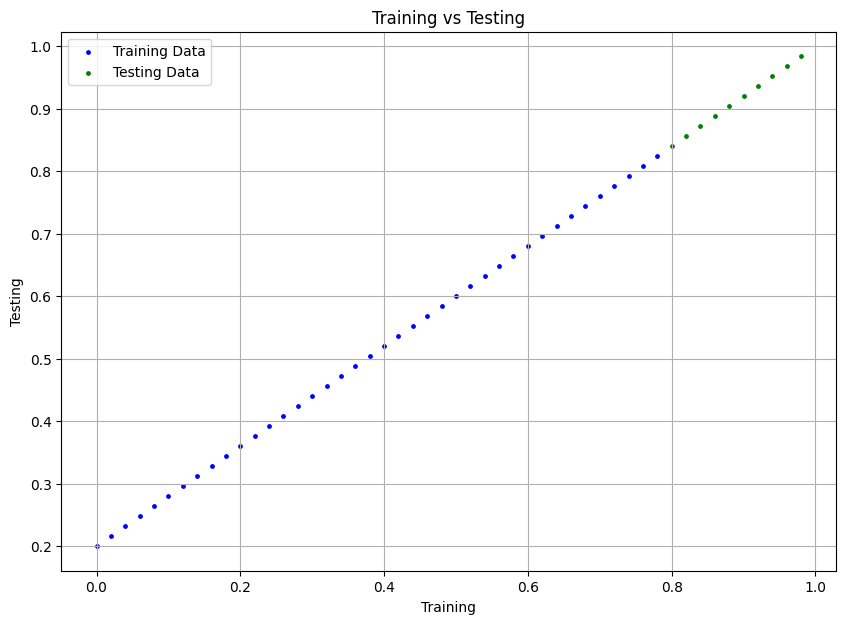

In [20]:
def plot_maker(train_data=x_train,
               train_labels=y_train,
               test_data=x_test,
               test_labels=y_test,
               prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,label="Training Data",c="b",s=6)
  plt.scatter(test_data,test_labels,label="Testing Data",c="g",s=6)
  plt.title("Training vs Testing")
  plt.xlabel("Training")
  plt.ylabel("Testing")
  if prediction is not None:
    plt.scatter(test_data,prediction,label="Prediction",c="r",s=6)
  plt.legend()
  plt.grid()
  plt.show()

plot_maker(train_data=x_train,
           train_labels=y_train,
           test_data=x_test,
           test_labels=y_test)

#Step 2: let Cook a model for this data

In [21]:
class LinearRegressionmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))


  def forward(self,x):
    return self.weights*x+self.bias

In [22]:
torch.manual_seed(42)
model_1=LinearRegressionmodel()
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

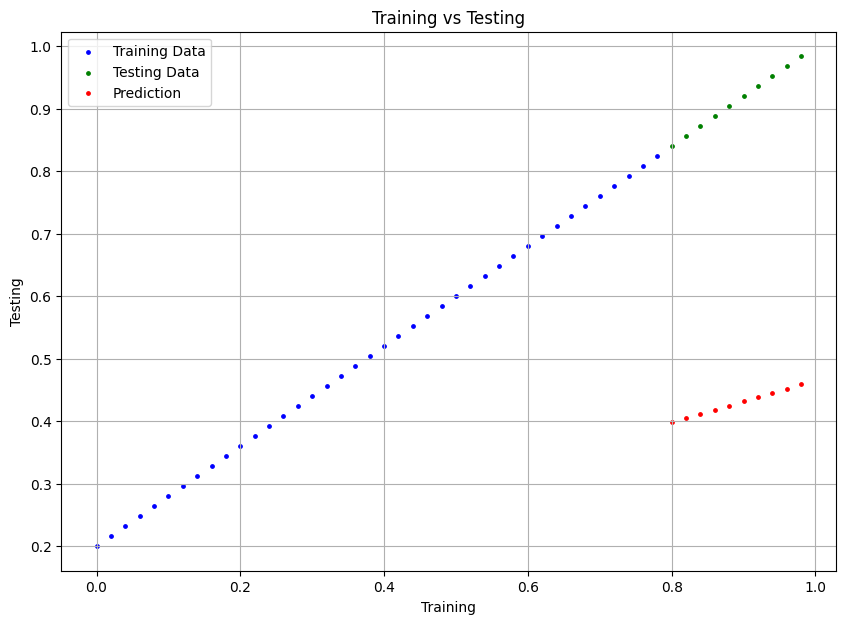

In [23]:
model_1.eval()
with torch.inference_mode():
  y_pred=model_1(x_test)

plot_maker(prediction=y_pred)


#Step 3: We will create loss function, optimizer, training and testing loop:

In [24]:
loss_function=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

In [25]:
torch.manual_seed(42)
epochs=225
epoch_count=[]
train_loss_value=[]
test_loss_value=[]
for epoch in range(epochs):
  model_1.train()
  train_pred=model_1(x_train)
  train_loss=loss_function(train_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(x_test)
    test_loss=loss_function(test_pred,y_test)


  if epoch%10==0:
    epoch_count.append(epoch)
    train_loss_value.append(train_loss)
    test_loss_value.append(test_loss)
    print(f"Epoch:{epoch} | Training Loss:{train_loss} |Test loss:{test_loss}")
    print(model_1.state_dict())

Epoch:0 | Training Loss:0.25188133120536804 |Test loss:0.470065176486969
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Training Loss:0.14190271496772766 |Test loss:0.33994418382644653
OrderedDict([('weights', tensor([0.3795])), ('bias', tensor([0.2343]))])
Epoch:20 | Training Loss:0.09042375534772873 |Test loss:0.2502245604991913
OrderedDict([('weights', tensor([0.4151])), ('bias', tensor([0.2923]))])
Epoch:30 | Training Loss:0.07359591871500015 |Test loss:0.19869937002658844
OrderedDict([('weights', tensor([0.4438])), ('bias', tensor([0.3183]))])
Epoch:40 | Training Loss:0.06710202991962433 |Test loss:0.1696048378944397
OrderedDict([('weights', tensor([0.4670])), ('bias', tensor([0.3268]))])
Epoch:50 | Training Loss:0.06304941326379776 |Test loss:0.152482807636261
OrderedDict([('weights', tensor([0.4868])), ('bias', tensor([0.3263]))])
Epoch:60 | Training Loss:0.059559416025877 |Test loss:0.14146271347999573
OrderedDict([('weights', tensor([0.5048

In [26]:
with torch.inference_mode():
  y_pred=model_1(x_test)

y_pred

tensor([[0.8345],
        [0.8502],
        [0.8660],
        [0.8817],
        [0.8974],
        [0.9131],
        [0.9288],
        [0.9445],
        [0.9603],
        [0.9760]])

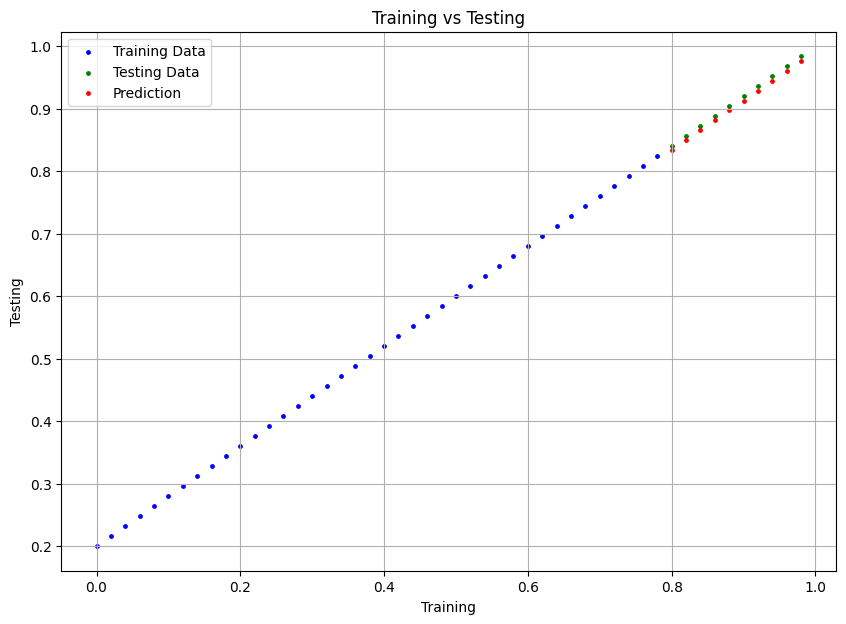

In [27]:
plot_maker(prediction=y_pred)

#Step 4: Training and Testing curve

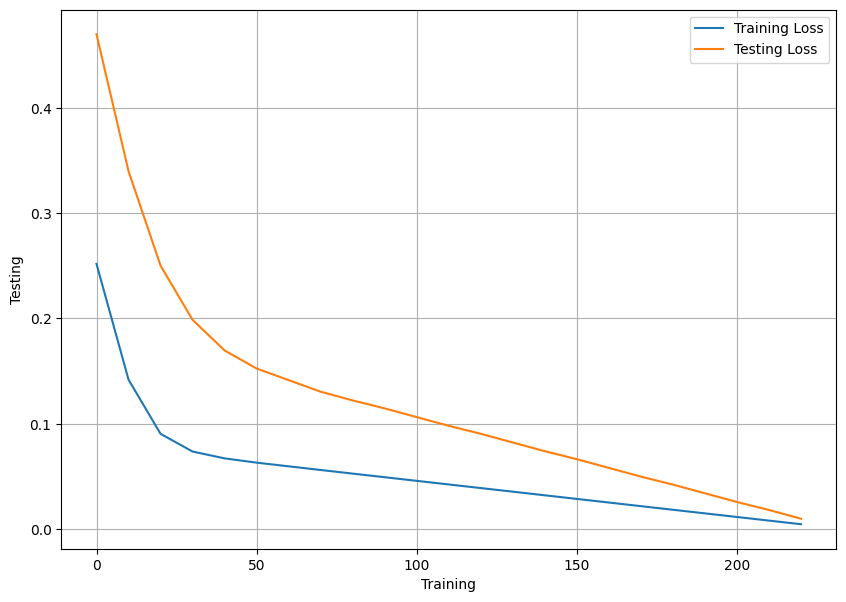

In [30]:
plt.figure(figsize=(10,7))
plt.plot(epoch_count,np.array(torch.tensor(train_loss_value).numpy()),label="Training Loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_value).numpy()),label="Testing Loss")
plt.xlabel("Training")
plt.ylabel("Testing")
plt.legend()
plt.grid()
plt.show()